# Phase 1: Basic data inspection 

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
# We're loading the 'dataset-big.csv' file into a pandas DataFrame.
# A DataFrame is like a table in a spreadsheet or a SQL database.
try:
    df = pd.read_csv('../data/dataset-big.csv')
    print("Dataset loaded successfully! 🎉")
except FileNotFoundError:
    print("Error: 'dataset-big.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the file isn't found

print("\n--- 1. Displaying the first 5 rows of the dataset ---")
# The .head() method shows the first few rows of the DataFrame.
# This gives us a quick glance at the data structure and content.
# By default, it shows the first 5 rows.
df.head()

Dataset loaded successfully! 🎉

--- 1. Displaying the first 5 rows of the dataset ---


,customer_id,subscription_type,monthly_bill,data_usage_gb,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,churn
0,C0001,Basic,50.89,11.55,4,4.59,24,4.02,1
1,C0002,Enterprise,520.19,75.44,0,13.35,1,4.50,0
2,C0003,Premium,152.05,41.84,3,42.12,1,4.15,0
3,C0004,Basic,43.32,10.40,1,14.98,1,5.00,0
4,C0005,Basic,51.90,24.67,2,53.15,24,3.94,0


In [2]:
print("\n--- 2. Getting a concise summary of the DataFrame ---")
# The .info() method prints a summary of the DataFrame.
# It includes the index dtype and column dtypes, non-null values, and memory usage.
# This is crucial for understanding data types (e.g., 'object' for text, 'int64' for integers, 'float64' for decimals)
# and for quickly seeing if there are missing values (by comparing 'Non-Null Count' to 'Total Entries').
df.info()


--- 2. Getting a concise summary of the DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1000 non-null   object 
 1   subscription_type       1000 non-null   object 
 2   monthly_bill            1000 non-null   float64
 3   data_usage_gb           950 non-null    float64
 4   support_tickets_opened  1000 non-null   int64  
 5   last_login_days_ago     1000 non-null   float64
 6   contract_length_months  1000 non-null   int64  
 7   customer_service_score  1000 non-null   float64
 8   churn                   1000 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [3]:
print("\n--- 3. Generating descriptive statistics ---")
# The .describe() method generates descriptive statistics that summarize the central tendency, dispersion,
# and shape of a dataset's distribution, excluding NaN values.
# For numerical columns, it shows count, mean, standard deviation (std), min, max, and quartiles (25%, 50%, 75%).
# This helps us understand the range and distribution of our numerical features.
df.describe()


--- 3. Generating descriptive statistics ---


,monthly_bill,data_usage_gb,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,churn
count,1000.000000,950.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,125.015190,43.170274,1.466000,18.715700,8.363000,3.954730,0.145000
std,135.704179,26.083971,1.167993,18.560078,8.748472,0.749639,0.352277
min,35.520000,4.990000,0.000000,0.010000,1.000000,1.050000,0.000000
25%,49.517500,23.992500,1.000000,5.382500,1.000000,3.440000,0.000000
50%,54.985000,37.025000,1.000000,13.255000,1.000000,3.985000,0.000000
75%,150.017500,56.635000,2.000000,25.110000,12.000000,4.570000,0.000000
max,608.550000,151.870000,6.000000,136.330000,24.000000,5.000000,1.000000


In [4]:
print("\n--- 4. Checking for missing values ---")
# The .isnull() method returns a DataFrame of boolean values indicating missing data (True for missing, False for not missing).
# The .sum() method then counts the number of True values (i.e., missing values) for each column.
# This is vital for identifying which columns have missing data and how much, as missing data needs to be handled.
df.isnull().sum()


--- 4. Checking for missing values ---


customer_id                0
subscription_type          0
monthly_bill               0
data_usage_gb             50
support_tickets_opened     0
last_login_days_ago        0
contract_length_months     0
customer_service_score     0
churn                      0
dtype: int64

In [5]:
print("\n--- 5. Checking unique values for 'subscription_type' and 'churn' ---")
# For categorical columns, it's good to see the unique values to understand their categories.
# 'subscription_type' is likely a categorical feature.
# 'churn' is our target variable, and we want to see its unique values (usually 0 or 1 for binary classification).
print("\nUnique values in 'subscription_type':", df['subscription_type'].unique(), "total distinct values: ", df['subscription_type'].nunique())
print("Unique values in 'churn':", df['churn'].unique(), "total distinct values: ", df['churn'].nunique())


--- 5. Checking unique values for 'subscription_type' and 'churn' ---

Unique values in 'subscription_type': ['Basic' 'Enterprise' 'Premium'] total distinct values:  3
Unique values in 'churn': [1 0] total distinct values:  2


In [6]:
print("shape of the data frame: (raws, cols): ", df.shape)
print("cols: ", df.shape[1])
print("raws: " ,len(df))
print("\nBasic data inspection complete. We've got a good initial understanding of our dataset! ✨")

shape of the data frame: (raws, cols):  (1000, 9)
cols:  9
raws:  1000

Basic data inspection complete. We've got a good initial understanding of our dataset! ✨


# Phase 2: Exploratory Data Analysis using Charts!

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (re-including for completeness, assuming this block is run independently)
try:
    df = pd.read_csv('../data/dataset-big.csv')
    print("Dataset loaded successfully for EDA! 🎉")
except FileNotFoundError:
    print("Error: 'dataset-big.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Adjust for better resolution in notebooks

print("\n--- Starting Exploratory Data Analysis with Charts ---")

Dataset loaded successfully for EDA! 🎉

--- Starting Exploratory Data Analysis with Charts ---


/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_66696/459493420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


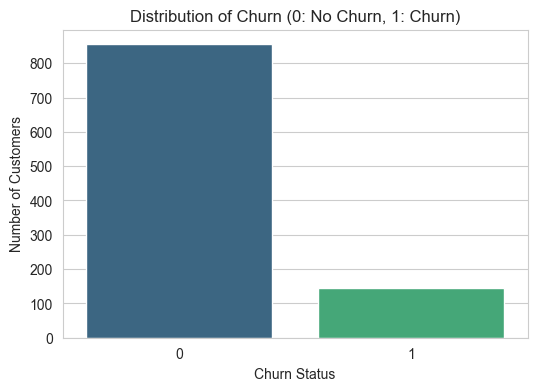

Interpretation: Shows the number of customers who churned vs. those who did not. Helps identify class imbalance.


In [8]:
# --- 1. Distribution of the Target Variable: Churn ---
# A countplot shows the counts of observations in each categorical bin using bars.
# This helps us see if our target variable (churn) is balanced or imbalanced.
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribution of Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()
print("Interpretation: Shows the number of customers who churned vs. those who did not. Helps identify class imbalance.")

/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_66696/637500680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subscription_type', data=df, palette='plasma')


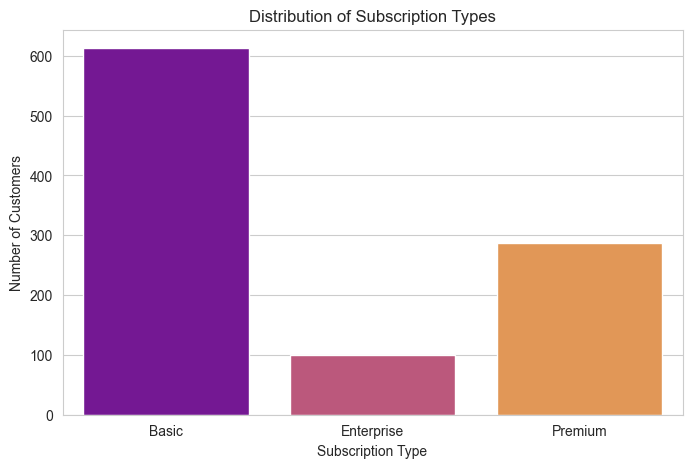

Interpretation: Reveals the popularity of different subscription tiers (Basic, Premium, Enterprise).


In [9]:
# --- 2. Distribution of Categorical Feature: Subscription Type ---
# Similar to churn, we want to see the distribution of different subscription types.
plt.figure(figsize=(8, 5))
sns.countplot(x='subscription_type', data=df, palette='plasma')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.show()
print("Interpretation: Reveals the popularity of different subscription tiers (Basic, Premium, Enterprise).")

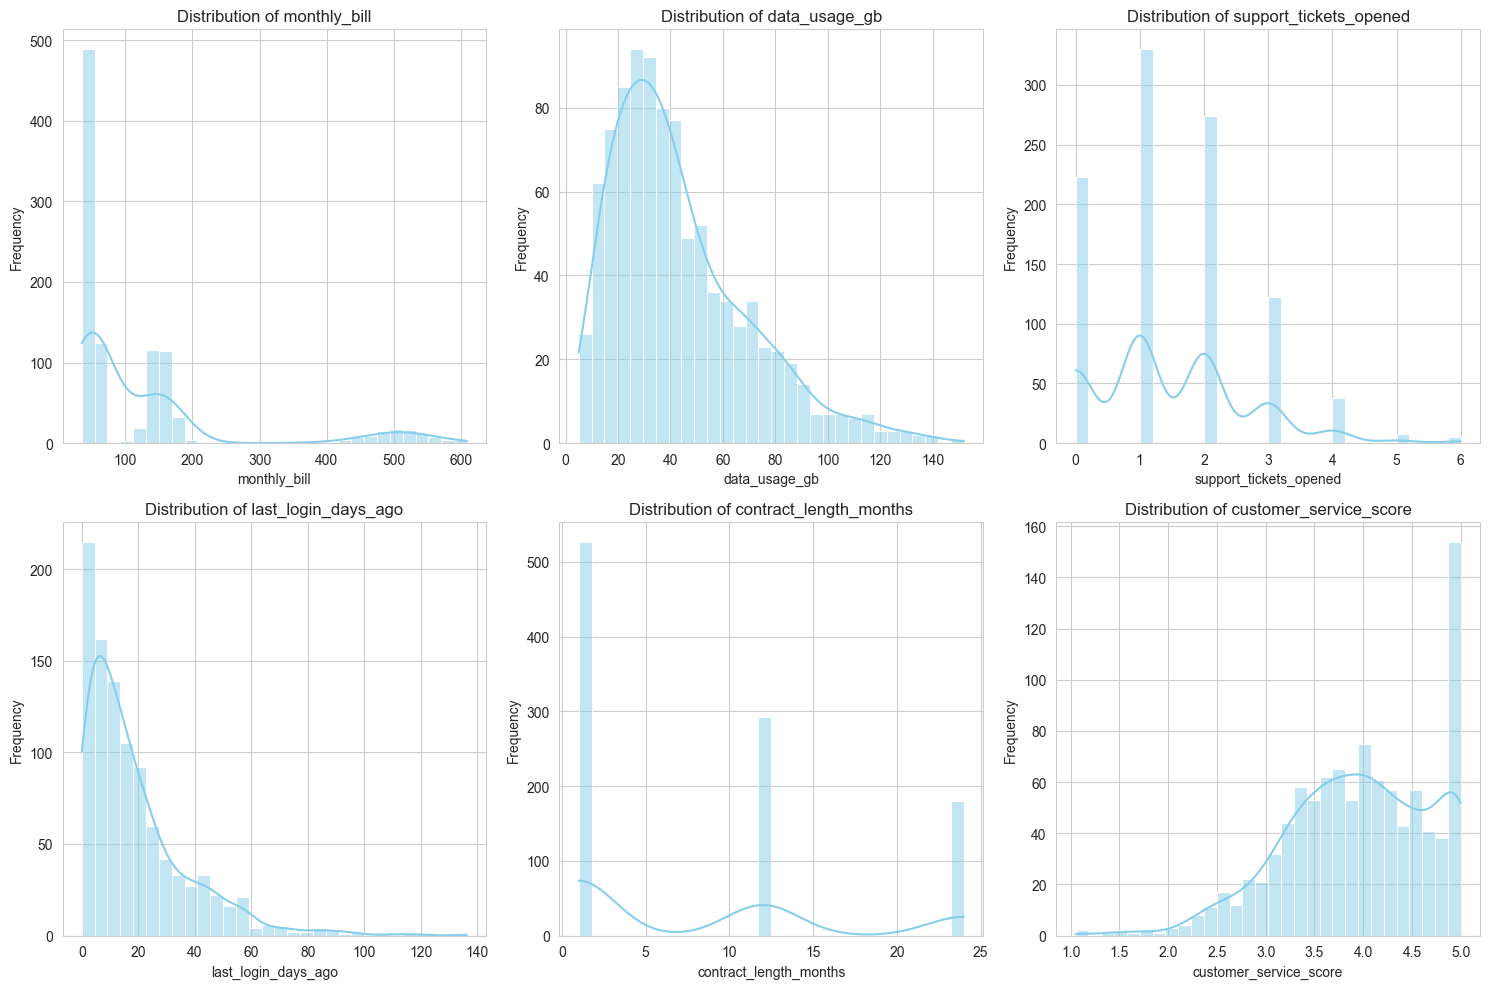

Interpretation: Histograms show the shape of the distribution for each numerical feature (e.g., normal, skewed).
Note: For 'data_usage_gb', missing values were temporarily dropped for plotting purposes.


In [10]:
# --- 3. Distribution of Numerical Features ---
# Histograms show the distribution of a numerical variable.
# We'll plot histograms for several key numerical features.
numerical_features = ['monthly_bill', 'data_usage_gb', 'support_tickets_opened',
                      'last_login_days_ago', 'contract_length_months', 'customer_service_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of subplots
    # For data_usage_gb, we'll drop NaN values for plotting to avoid errors,
    # as imputation will be handled in a later step.
    if col == 'data_usage_gb':
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    else:
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()
print("Interpretation: Histograms show the shape of the distribution for each numerical feature (e.g., normal, skewed).")
print("Note: For 'data_usage_gb', missing values were temporarily dropped for plotting purposes.")

/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_66696/1294516478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df, palette='coolwarm')
/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_66696/1294516478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df.dropna(subset=[col]), palette='coolwarm')
/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_66696/1294516478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df, palette='coolwarm')

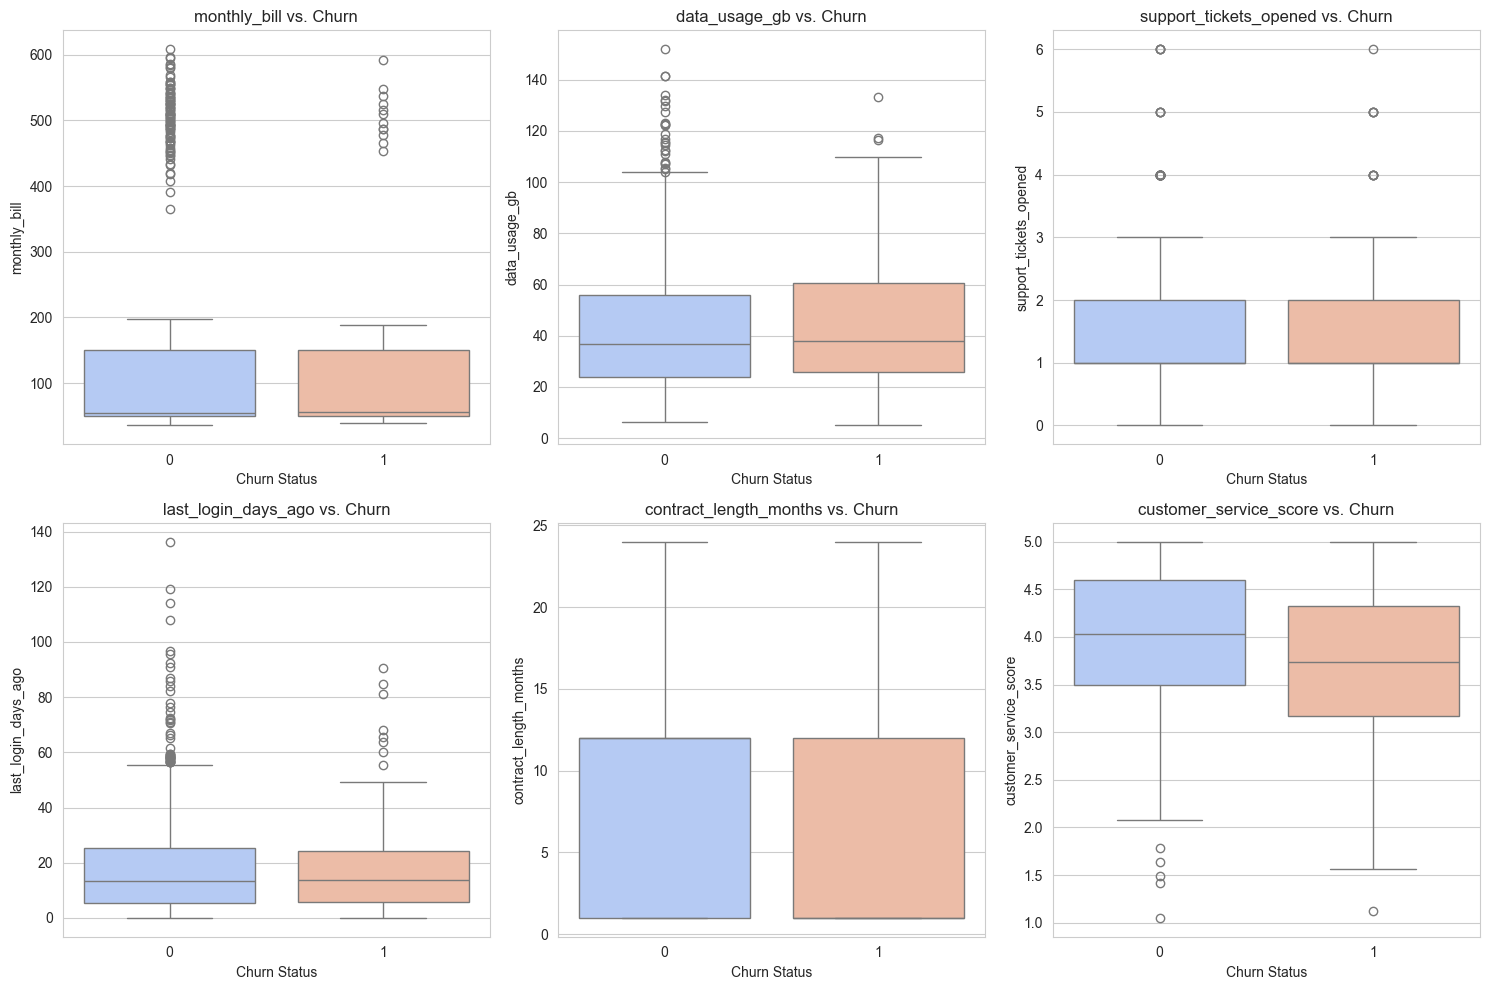

Interpretation: Box plots compare the distribution of numerical features for churned vs. non-churned customers. Look for differences in medians or spread.


In [11]:
# --- 4. Relationship between Numerical Features and Churn ---
# Box plots are great for visualizing the distribution of a numerical variable
# across different categories of a categorical variable (in this case, churn).
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    if col == 'data_usage_gb':
        # Again, drop NaNs for plotting
        sns.boxplot(x='churn', y=col, data=df.dropna(subset=[col]), palette='coolwarm')
    else:
        sns.boxplot(x='churn', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Churn Status')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
print("Interpretation: Box plots compare the distribution of numerical features for churned vs. non-churned customers. Look for differences in medians or spread.")


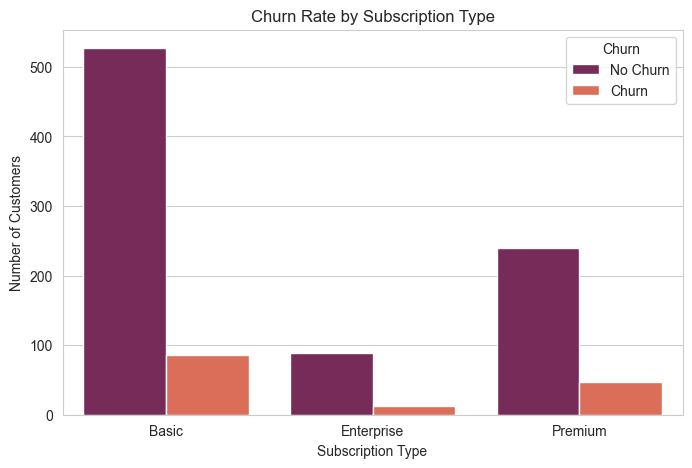

Interpretation: Shows which subscription types have a higher proportion of churned customers.


In [12]:
# --- 5. Relationship between Categorical Feature and Churn ---
# A countplot with 'hue' helps visualize the relationship between two categorical variables.
# Here, we see how churn varies across different subscription types.
plt.figure(figsize=(8, 5))
sns.countplot(x='subscription_type', hue='churn', data=df, palette='rocket')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()
print("Interpretation: Shows which subscription types have a higher proportion of churned customers.")

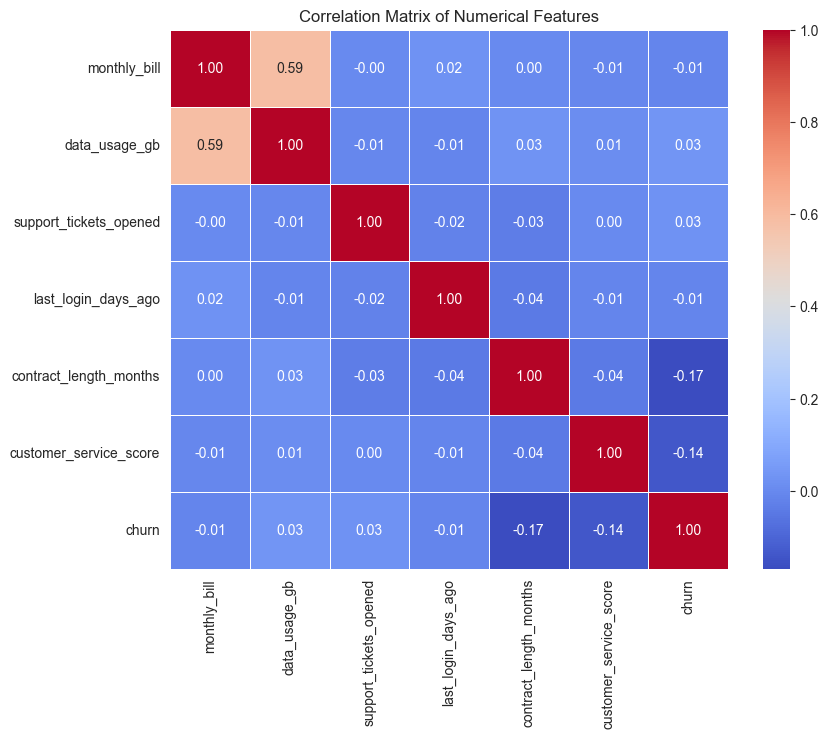

Interpretation: A heatmap displays the correlation coefficients between numerical features. Values close to 1 or -1 indicate strong positive or negative correlation, respectively. Values close to 0 indicate weak correlation.

Exploratory Data Analysis with charts complete! 🎨


In [13]:
# --- 6. Correlation Matrix of Numerical Features ---
# A correlation matrix shows the pairwise correlation between numerical variables.
# A heatmap is a great way to visualize this matrix.
# We'll calculate correlations after dropping 'customer_id' and 'churn' for this specific plot.
# Also, we'll drop rows with any NaN values for correlation calculation to ensure valid results.
numerical_features = ['monthly_bill', 'data_usage_gb', 'support_tickets_opened',
                      'last_login_days_ago', 'contract_length_months', 'customer_service_score','churn']
correlation_matrix = df[numerical_features].dropna().corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Interpretation: A heatmap displays the correlation coefficients between numerical features. Values close to 1 or -1 indicate strong positive or negative correlation, respectively. Values close to 0 indicate weak correlation.")

numerical_features = ['monthly_bill', 'data_usage_gb', 'support_tickets_opened',
                      'last_login_days_ago', 'contract_length_months', 'customer_service_score']

print("\nExploratory Data Analysis with charts complete! 🎨")

# Phase 3: Feature Engineering

In [14]:
import pandas as pd
import numpy as np

# Load the dataset (re-including for completeness, assuming this block is run independently)
try:
    df = pd.read_csv('../data/dataset-big.csv')
    print("Dataset loaded successfully for Feature Engineering! �")
except FileNotFoundError:
    print("Error: 'dataset-big.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("\n--- Starting Feature Engineering ---")

Dataset loaded successfully for Feature Engineering! �

--- Starting Feature Engineering ---


In [15]:
# --- 1. Create a 'bill_per_gb' feature ---
# This feature aims to capture the "value for money" a customer gets.
# It's calculated as monthly_bill divided by data_usage_gb.
# We need to be careful about division by zero or missing data_usage_gb.
# If data_usage_gb is 0 or NaN, this feature will also be NaN or Inf.
# We'll handle these NaNs/Infs in the next step (imputation).
df['bill_per_gb'] = df['monthly_bill'] / df['data_usage_gb']
print("Created 'bill_per_gb' feature.")
df

Created 'bill_per_gb' feature.


,customer_id,subscription_type,monthly_bill,data_usage_gb,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,churn,bill_per_gb
0,C0001,Basic,50.89,11.55,4,4.59,24,4.02,1,4.406061
1,C0002,Enterprise,520.19,75.44,0,13.35,1,4.50,0,6.895414
2,C0003,Premium,152.05,41.84,3,42.12,1,4.15,0,3.634082
3,C0004,Basic,43.32,10.40,1,14.98,1,5.00,0,4.165385
4,C0005,Basic,51.90,24.67,2,53.15,24,3.94,0,2.103770
...,...,...,...,...,...,...,...,...,...,...
995,C0996,Basic,52.30,30.24,1,24.42,1,3.06,0,1.729497
996,C0997,Enterprise,478.53,60.59,2,11.99,1,4.33,1,7.897838
997,C0998,Basic,46.61,57.01,2,2.12,1,3.99,1,0.817576
998,C0999,Enterprise,465.38,72.20,0,24.59,1,3.73,0,6.445706


In [16]:
# --- 2. Create 'is_short_term_contract' feature ---
# We can categorize 'contract_length_months' into short-term vs. long-term.
# A common threshold for short-term contracts is 1 month.
# This creates a binary (0 or 1) feature.
df['is_short_term_contract'] = (df['contract_length_months'] == 1).astype(int)
print("Created 'is_short_term_contract' feature (1 if contract is 1 month, 0 otherwise).")
df

Created 'is_short_term_contract' feature (1 if contract is 1 month, 0 otherwise).


,customer_id,subscription_type,monthly_bill,data_usage_gb,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,churn,bill_per_gb,is_short_term_contract
0,C0001,Basic,50.89,11.55,4,4.59,24,4.02,1,4.406061,0
1,C0002,Enterprise,520.19,75.44,0,13.35,1,4.50,0,6.895414,1
2,C0003,Premium,152.05,41.84,3,42.12,1,4.15,0,3.634082,1
3,C0004,Basic,43.32,10.40,1,14.98,1,5.00,0,4.165385,1
4,C0005,Basic,51.90,24.67,2,53.15,24,3.94,0,2.103770,0
...,...,...,...,...,...,...,...,...,...,...,...
995,C0996,Basic,52.30,30.24,1,24.42,1,3.06,0,1.729497,1
996,C0997,Enterprise,478.53,60.59,2,11.99,1,4.33,1,7.897838,1
997,C0998,Basic,46.61,57.01,2,2.12,1,3.99,1,0.817576,1
998,C0999,Enterprise,465.38,72.20,0,24.59,1,3.73,0,6.445706,1


In [17]:
# --- 3. Create 'customer_engagement_level' feature ---
# Based on 'last_login_days_ago', we can categorize customer engagement.
# This might provide a more intuitive understanding of recency than the raw number.
# We'll use pandas' .cut() function to bin the numerical data into categories.
# 'bins' define the boundaries for the categories.
# 'labels' assign names to these categories.
# 'right=False' means the rightmost bin edge is exclusive (e.g., [0, 7) means 0 up to, but not including, 7).
bins = [-1, 7, 30, df['last_login_days_ago'].max() + 1] # Ensure the last bin covers max value
labels = ['Highly Active', 'Moderately Active', 'Inactive']
df['customer_engagement_level'] = pd.cut(
    df['last_login_days_ago'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True # Include the lowest value in the first bin
)
df

,customer_id,subscription_type,monthly_bill,data_usage_gb,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,churn,bill_per_gb,is_short_term_contract,customer_engagement_level
0,C0001,Basic,50.89,11.55,4,4.59,24,4.02,1,4.406061,0,Highly Active
1,C0002,Enterprise,520.19,75.44,0,13.35,1,4.50,0,6.895414,1,Moderately Active
2,C0003,Premium,152.05,41.84,3,42.12,1,4.15,0,3.634082,1,Inactive
3,C0004,Basic,43.32,10.40,1,14.98,1,5.00,0,4.165385,1,Moderately Active
4,C0005,Basic,51.90,24.67,2,53.15,24,3.94,0,2.103770,0,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0996,Basic,52.30,30.24,1,24.42,1,3.06,0,1.729497,1,Moderately Active
996,C0997,Enterprise,478.53,60.59,2,11.99,1,4.33,1,7.897838,1,Moderately Active
997,C0998,Basic,46.61,57.01,2,2.12,1,3.99,1,0.817576,1,Highly Active
998,C0999,Enterprise,465.38,72.20,0,24.59,1,3.73,0,6.445706,1,Moderately Active


In [18]:
# Check info again to see new columns and their types
print("\n--- DataFrame Info after Feature Engineering ---")
print(df.info())

# Check for missing values in the newly created 'bill_per_gb'
print("\n--- Missing values after Feature Engineering ---")
print(df.isnull().sum())

print("\nFeature Engineering complete! We've added some potentially insightful new dimensions to our data. 💡")


--- DataFrame Info after Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_id                1000 non-null   object  
 1   subscription_type          1000 non-null   object  
 2   monthly_bill               1000 non-null   float64 
 3   data_usage_gb              950 non-null    float64 
 4   support_tickets_opened     1000 non-null   int64   
 5   last_login_days_ago        1000 non-null   float64 
 6   contract_length_months     1000 non-null   int64   
 7   customer_service_score     1000 non-null   float64 
 8   churn                      1000 non-null   int64   
 9   bill_per_gb                950 non-null    float64 
 10  is_short_term_contract     1000 non-null   int64   
 11  customer_engagement_level  1000 non-null   category
dtypes: category(1), float64(5), int64(4), obj

# Phase 4: Feature Scaling: Normalisation and Standarisation: Imputation and Encoding

In [19]:
# We'll drop 'customer_id' and 'churn' for now as they are not features
# and 'data_usage_gb' will be imputed and then dropped, so we are keeping it for now
if 'customer_id' in df.columns:
    X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']

print("\n--- Starting Feature Imputation and Encoding ---")


--- Starting Feature Imputation and Encoding ---


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for imputation
numerical_features_to_impute = ['data_usage_gb', 'bill_per_gb']

# Create a preprocessor pipeline using ColumnTransformer
# This is a powerful tool to apply different transformations to different columns.

# Pipeline for numerical features: imputation with the median
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [21]:
# Define columns for encoding 
categorical_features_to_encode = ['subscription_type', 'customer_engagement_level']

# Pipeline for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [22]:
# Use ColumnTransformer to apply these pipelines to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_to_impute),
        ('cat', categorical_transformer, categorical_features_to_encode)
    ],
    remainder='passthrough' # Keep other columns as they are
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Let's get the final list of column names after transformation
# This is a bit tricky with ColumnTransformer, but we can access the feature names
# from the one-hot encoder and combine them with the original numerical features
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features_to_encode)
passthrough_cols = [col for col in X.columns if col not in numerical_features_to_impute + categorical_features_to_encode]
processed_feature_names = list(numerical_features_to_impute) + list(onehot_feature_names) + list(passthrough_cols)

# Convert the processed array back into a DataFrame for easier inspection
X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

In [23]:
print("\n--- Processed DataFrame Information ---")
print(X_processed_df.info())

print("\n--- First 5 rows of the Processed DataFrame ---")
print(X_processed_df.head())

print("\nFeature Encoding and Imputation complete! The data is now clean and ready for modeling. ✨")
X_processed_df


--- Processed DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   data_usage_gb                                1000 non-null   float64
 1   bill_per_gb                                  1000 non-null   float64
 2   subscription_type_Enterprise                 1000 non-null   float64
 3   subscription_type_Premium                    1000 non-null   float64
 4   customer_engagement_level_Inactive           1000 non-null   float64
 5   customer_engagement_level_Moderately Active  1000 non-null   float64
 6   monthly_bill                                 1000 non-null   float64
 7   support_tickets_opened                       1000 non-null   float64
 8   last_login_days_ago                          1000 non-null   float64
 9   contract_length_months            

,data_usage_gb,bill_per_gb,subscription_type_Enterprise,subscription_type_Premium,customer_engagement_level_Inactive,customer_engagement_level_Moderately Active,monthly_bill,support_tickets_opened,last_login_days_ago,contract_length_months,customer_service_score,is_short_term_contract
0,11.55,4.406061,0.0,0.0,0.0,0.0,50.89,4.0,4.59,24.0,4.02,0.0
1,75.44,6.895414,1.0,0.0,0.0,1.0,520.19,0.0,13.35,1.0,4.50,1.0
2,41.84,3.634082,0.0,1.0,1.0,0.0,152.05,3.0,42.12,1.0,4.15,1.0
3,10.40,4.165385,0.0,0.0,0.0,1.0,43.32,1.0,14.98,1.0,5.00,1.0
4,24.67,2.103770,0.0,0.0,1.0,0.0,51.90,2.0,53.15,24.0,3.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,30.24,1.729497,0.0,0.0,0.0,1.0,52.30,1.0,24.42,1.0,3.06,1.0
996,60.59,7.897838,1.0,0.0,0.0,1.0,478.53,2.0,11.99,1.0,4.33,1.0
997,57.01,0.817576,0.0,0.0,0.0,0.0,46.61,2.0,2.12,1.0,3.99,1.0
998,72.20,6.445706,1.0,0.0,0.0,1.0,465.38,0.0,24.59,1.0,3.73,1.0


# Phase 5: Training a Decision Tree 


In [24]:
from sklearn.model_selection import train_test_split

# --- 2. Splitting Data into Training and Testing Sets ---
# This is a crucial step! We split our data into two parts:
# - Training set: Used to train the model. The model learns patterns from this data.
# - Testing set: Used to evaluate the model's performance on unseen data.
#   This helps us understand how well the model generalizes to new customers.
# 'test_size=0.2' means 20% of the data will be used for testing, 80% for training.
# 'random_state=42' ensures reproducibility. If you run the code again, you'll get the same split.
# 'stratify=y' is very important for classification tasks, especially with imbalanced classes.
#   It ensures that the proportion of churned (1) and non-churned (0) customers
#   is roughly the same in both the training and testing sets as it is in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify stratification (optional, but good for understanding)
print("\nChurn distribution in original data:")
print(y.value_counts(normalize=True))
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in testing set:")
print(y_test.value_counts(normalize=True))


Data split into training and testing sets:
X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)

Churn distribution in original data:
churn
0    0.855
1    0.145
Name: proportion, dtype: float64

Churn distribution in training set:
churn
0    0.855
1    0.145
Name: proportion, dtype: float64

Churn distribution in testing set:
churn
0    0.855
1    0.145
Name: proportion, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# --- 3. Training the Decision Tree Classifier ---
# We initialize our Decision Tree model.
# 'random_state=42' for reproducibility.
# 'max_depth=5' is a hyperparameter. It limits the maximum depth of the tree.
#   This helps prevent overfitting (where the model learns the training data too well,
#   but performs poorly on new, unseen data). A shallower tree is simpler and
#   often generalizes better. We can tune this later if needed.
# 'min_samples_leaf=10' is another hyperparameter. It specifies the minimum number
#   of samples required to be at a leaf node. This also helps prevent overfitting
#   by ensuring that each decision path has a reasonable number of samples supporting it.
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=10)

# Now, we train the model using the training data.
# The .fit() method is where the Decision Tree algorithm learns the patterns.
dt_classifier.fit(X_train, y_train)

print("\nDecision Tree Model Training Complete! 🚀")
print(f"Model trained with max_depth={dt_classifier.max_depth} and min_samples_leaf={dt_classifier.min_samples_leaf}")

print("\nReady for the next step: Evaluation of Outcome on Required Metrics!")


Decision Tree Model Training Complete! 🚀
Model trained with max_depth=5 and min_samples_leaf=10

Ready for the next step: Evaluation of Outcome on Required Metrics!


# Testing

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# --- 1. Making Predictions on the Test Set ---
# We use the trained model to predict the churn status for our unseen test data (X_test).
y_pred = dt_classifier.predict(X_test)
print("Predictions made on the test set. 🤖")

Predictions made on the test set. 🤖


In [29]:
# --- 2. Confusion Matrix ---
# The confusion matrix is a table that shows the number of correct and incorrect predictions
# made by the classification model compared to the actual outcomes.
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)
print("Interpretation:")
print(f"True Negatives (Top-Left): {cm[0, 0]} - Correctly predicted 'No Churn'.")
print(f"False Positives (Top-Right): {cm[0, 1]} - Incorrectly predicted 'Churn' for 'No Churn' customers.")
print(f"False Negatives (Bottom-Left): {cm[1, 0]} - Incorrectly predicted 'No Churn' for 'Churn' customers.")
print(f"True Positives (Bottom-Right): {cm[1, 1]} - Correctly predicted 'Churn'.")


--- Confusion Matrix ---
[[165   6]
 [ 27   2]]
Interpretation:
True Negatives (Top-Left): 165 - Correctly predicted 'No Churn'.
False Positives (Top-Right): 6 - Incorrectly predicted 'Churn' for 'No Churn' customers.
False Negatives (Bottom-Left): 27 - Incorrectly predicted 'No Churn' for 'Churn' customers.
True Positives (Bottom-Right): 2 - Correctly predicted 'Churn'.


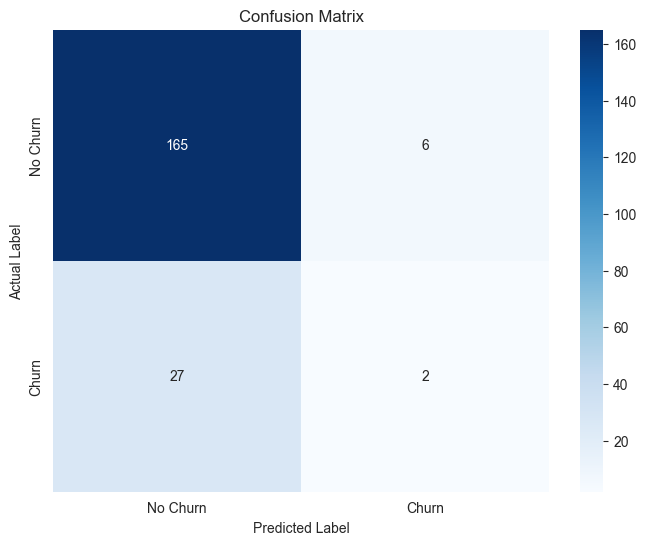

In [30]:
# Let's visualize the confusion matrix for better understanding
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [31]:
# --- 3. Key Performance Metrics ---
# We calculate and print the core metrics derived from the confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) # zero_division=0 to handle cases with no positive predictions
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n--- Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



--- Performance Metrics ---
Accuracy: 0.8350
Precision: 0.2500
Recall: 0.0690
F1-Score: 0.1081


In [32]:
# --- 4. Classification Report ---
# This is a convenient function that provides all of the above metrics in a clean format.
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)'], zero_division=0))

print("\nEvaluation of model performance complete! ✅")


--- Classification Report ---
              precision    recall  f1-score   support

No Churn (0)       0.86      0.96      0.91       171
   Churn (1)       0.25      0.07      0.11        29

    accuracy                           0.83       200
   macro avg       0.55      0.52      0.51       200
weighted avg       0.77      0.83      0.79       200


Evaluation of model performance complete! ✅


# Concluding Remarks on the Churn Prediction Model 📊
We've successfully developed an end-to-end machine learning pipeline, from data inspection and feature engineering to training and evaluating a Decision Tree model for churn prediction. Looking at the evaluation metrics, we can draw some important conclusions:

Our model achieved an overall accuracy of 83.50%. While this number might seem good at first glance, it's crucial to look deeper, especially because we know our dataset has a class imbalance (more non-churners than churners).

Let's break down the performance for each class:

* For "No Churn" (Class 0): The model performs exceptionally well here, with a precision of 0.86, recall of 0.96, and an F1-score of 0.91. This means it's very good at correctly identifying customers who will not churn. From the confusion matrix, we see 165 True Negatives (correctly predicted no churn) and only 6 False Positives (incorrectly predicted churn).

* For "Churn" (Class 1): This is where we see the primary challenge. The model has a precision of 0.25, a recall of 0.07, and an F1-score of 0.11.

* The low recall (0.07) for churn is particularly concerning. It means our model is only catching about 7% of the customers who actually churn. In the confusion matrix, we have 27 False Negatives (customers who churned but our model predicted they wouldn't) compared to only 2 True Positives (customers who churned and our model correctly identified them). For a churn prediction model, missing actual churners (False Negatives) is often more costly than incorrectly flagging non-churners (False Positives), as it means missed opportunities for retention efforts.

* The low precision (0.25) for churn means that when our model does predict a customer will churn, it's only correct about 25% of the time. This could lead to wasted resources if we apply retention strategies to customers who weren't actually going to churn.

* In summary, our current Decision Tree model is very effective at identifying stable customers, but it struggles significantly to identify customers who are actually at risk of churning. This is a common issue with imbalanced datasets and highlights why metrics beyond simple accuracy are so important.

# Next Steps for Improvement 🚀
To make this model more useful for churn prediction, our next steps should focus on improving its ability to detect the minority "churn" class:

Address Class Imbalance More Directly:

1. Oversampling: Consider techniques like SMOTE (Synthetic Minority Over-sampling Technique) on the training data. SMOTE creates synthetic samples of the minority class, helping the model learn more effectively from the patterns of churners.

2. Undersampling: While less common for churn due to potential data loss, you could explore techniques to reduce the majority class.

3. Hyperparameter Tuning: Experiment with different max_depth and min_samples_leaf values for the Decision Tree, or even other hyperparameters like min_samples_split. A slightly deeper tree or different leaf requirements might capture more churn patterns without overfitting too much.

4. Explore Other Algorithms: Decision Trees are a good start, but other algorithms, especially ensemble methods like Random Forest or Gradient Boosting (e.g., XGBoost, LightGBM), often perform better on imbalanced datasets and can be more robust.

5. Feature Importance Analysis: Once we have a better-performing model, we can analyze feature importance to understand which factors are most strongly driving churn predictions. This can provide valuable business insights.